
# Linear algerbra

Along with probability and statistics, multivariable calculus, linear algebra is one of the key area of maths involved in deep learning. We represent neural networks using matrices, and linear algebra is key for understanding how to work with these matrices.  In order to drill deeper into many machine learning algorithms a good foundation linear algebra will go a long way. 
Linear algebra is also very important in computer graphics (since it allows us to effectively describe space), and hence GPU (graphics processing units) where originally designed to do linear algebra very fast. In more recent years there ability to preform matrix maths efficently has been repurposed for deep learning. For further understanding on GPU’s, their relevance to Deep Learning see [here](https://www.analyticsvidhya.com/blog/2017/05/gpus-necessary-for-deep-learning/)

In [25]:
from ipywidgets import interactive


# Vectors 

Vectors are basically a list of numbers.

$$ v = \begin{bmatrix}
v_1\\ 
v_2\\ 
\end{bmatrix} $$

In the vector $ v $ is a column vector and we'd say $ v_1 $ is the first component, $ v_2 $ is the second component. When we add vectors we add each individual component.

$$ v = \begin{bmatrix}
v_1\\ 
v_2\\ 
\end{bmatrix} \qquad
w = \begin{bmatrix}
w_1\\ 
w_2\\ 
\end{bmatrix}  \qquad
v + w = \begin{bmatrix}
v_1 + w_1\\ 
v_2 + w_2\\ 
\end{bmatrix} $$



We could do this with python like.

In [2]:
v = [1,2,3,4] 
w = [5,6,7,8]
z = [v[i] + w[i] for i in range(len(v))]
print(z)

[6, 8, 10, 12]


In [26]:
v = [1,2,3,4] 
w = [5,6,7,8]
z = [0]

for i in range( len(v)):
    z[i] = v[i] + w[i]


[6, 8, 10, 12]

Notice we have to use a for loop to add each element. This can get tiresome, thankfully numpy helps us out here, as it automatically does the component-wise addition for us.

In [27]:
v = np.array([1,2,3,4])


array([ 6,  8, 10, 12])

In [4]:
import numpy as np
v = np.array(v)
w = np.array(w)
z = v + w
print(z)

[ 6  8 10 12]


Another common operation is scalar multiplication in which we multiple each element in a vector by a scalar (number)

$$ 2v = \begin{bmatrix}
2v_1\\ 
2v_2\\ 
\end{bmatrix} $$

Often instead of thinking of vectors a list of numbers we like to think of them as points in space. For example a vector with two components can be though of as a point in the xy plane.

## Interpretation

The vector  $ \begin{bmatrix} 3\\ -2 \\ \end{bmatrix} $, means go right 3 steps and down -2 steps. Vectors can be interpreted either as points space or and arrow pointing from the origin to a point.  We can show this in code by plotting it. 




(-10, 10)

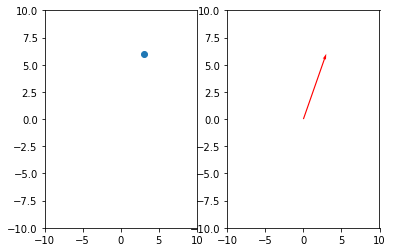

In [28]:
fig,axes = plt.subplots(1,2)


### JHO's Notes
Notice that the [asterisk * ](https://medium.com/understand-the-python/understanding-the-asterisk-of-python-8b9daaa4a558) operator here does the task of unpacking the last object origin  
[quiver](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html) in matplotlib is used to plot arrows. For how to use quiver, see this [stackoverflow post](https://stackoverflow.com/questions/42281966/how-to-plot-vectors-in-python-using-matplotlib/42284007)

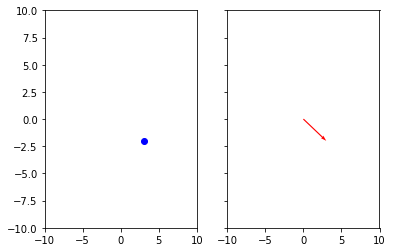

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1,2, sharex= True, sharey= True)

V = [3,-2]
origin = [0,0] # origin point

axes[0].plot(V[0], V[1], color = 'b', marker ='o')
axes[1].quiver(*origin,V[0],V[1], color ='r', angles = 'xy', scale_units='xy', scale=1)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

The interetation as arrow makes more sense when we add two vectors, since we can think it as traveling to the end of the first vector and then to a another.

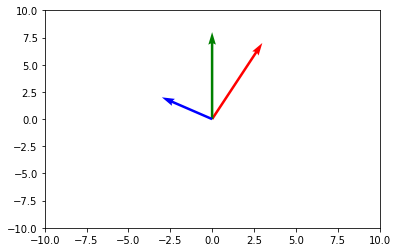

In [56]:
V = np.array([[3,7],[0,8],[-3,2]])
origin = [0],[0]
lims = (-10, 10)
plt.xlim(*lims)
plt.ylim(*lims)
plt.quiver(*origin, V[:,0], V[:,1], color=['r','g','b'], angles='xy', scale_units='xy', scale=1)

(-10, 10)

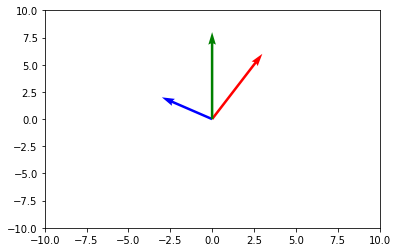

# Linear combinations

Lets say we have a bunch of vectors of length n:

$$ v_1, v_2,... v_n \in  \mathbb{R}^n $$

A linear comination of them means we scale them by a number and add them together

In [30]:
v1 = np.array([1,2,3])


array([14, 19, 24])

# Linear Span

By multiplying each vector by a scalar and then adding them together (a linear comination), which points can you reach? The set of all possible vectors (or points) that you can reach given a linear combination of vectors vectors is called the span of those vectors. For a great explanation see [](https://www.youtube.com/watch?v=k7RM-ot2NWY)

In our normal coordinate system we use the basis vectors.

* $ \hat{i} = \begin{bmatrix}
0\\ 
1 
\end{bmatrix} $
* $ \hat{j} = \begin{bmatrix}
1\\ 
0 
\end{bmatrix} $

When we give coridinates $(x,y)$ we use them to scale the basis vectors and then add them together, using this we can reach any point (if the vectors are linearly indpedent, covered later).

$$  x  \begin{bmatrix}
1 \\
0 
\end{bmatrix}   + 
 y \begin{bmatrix}
0 \\
1 
\end{bmatrix}   =
\begin{bmatrix}
x \\
y 
\end{bmatrix}
$$

Bellow is a interactive plot to demo this.

In [31]:
def f(x,y):


interactive(children=(IntSlider(value=0, description='x', max=10, min=-10), IntSlider(value=0, description='y'…

But who says we have to use the standard basis vectors, we could use some other vectors to define our coordinate system, and in most case it will should work.

interactive(children=(IntSlider(value=0, description='x', max=10, min=-10), IntSlider(value=0, description='y'…

If we get unlucky and we choose two vectors that are on the same line or are ** linearly dependent **, then we can only travel on that line.

interactive(children=(IntSlider(value=0, description='x', max=10, min=-10), IntSlider(value=0, description='y'…

# Dot Product

Given two vectors we can get the dot product by multiplying each element together and then taking the sum of the final vector.

$$ v \cdot w = v_1 w_1 + v_2 w_2 $$


We can represent this in python code like so

In [22]:
v = [1,2,3,4,5]


130

The dot product exhibts some very usefull properties:

* Commutatuve - $ \textbf{r} \cdot \textbf{s} = \textbf{s} \cdot \textbf{r} $
* Distributive - $ \textbf{r} \cdot \textbf{(s + t )}= \textbf{r} \cdot \textbf{s} + \textbf{r} \cdot \textbf{t} $
* Associative  $ \textbf{r} \cdot (a \textbf{s}) = a(\textbf{r} \cdot \textbf{s}) $


# Exercises

** 1. **   Create vector  $ a $ with values ranging from 1 to 10. Create another vector $ b $ with values ranging from 21 to 30. Take the dot product of $ a $ and $ b $.

In [63]:
a = np.arange(1, 11)
b = np.arange(21,31)
print(a)
print(b)
print(a @ b)
print( sum(a * b))

[ 1  2  3  4  5  6  7  8  9 10]
[21 22 23 24 25 26 27 28 29 30]
1485
1485


** 2. **
Create a vector with values only even values ranging from 1 to 100 . 


In [64]:
V = np.arange(2,101, 2)
print(V)

[  2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36
  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72
  74  76  78  80  82  84  86  88  90  92  94  96  98 100]


** 3. **  How do you reverse a vector ?

In [65]:
V[::-1]

array([100,  98,  96,  94,  92,  90,  88,  86,  84,  82,  80,  78,  76,
        74,  72,  70,  68,  66,  64,  62,  60,  58,  56,  54,  52,  50,
        48,  46,  44,  42,  40,  38,  36,  34,  32,  30,  28,  26,  24,
        22,  20,  18,  16,  14,  12,  10,   8,   6,   4,   2])

** 4. **  Find indices of all non-zero elements from  $ [1,23,0,2,4,0] $. * Hint * `np.nonzero`


In [59]:
a = np.array([1,23,0,2,4,0])
np.nonzero(a)

(array([0, 1, 3, 4]),)

** 5. **  The three corners of a parallelogram are $ (1,1) $, $ (4,2) $, and $ (1,3) $, this is plotted bellow. What are the 3 other possible corners? Use vector addtion to get to get the other corners.

d:[-3 -1], e:[ 0 -2]


(-3, 5)

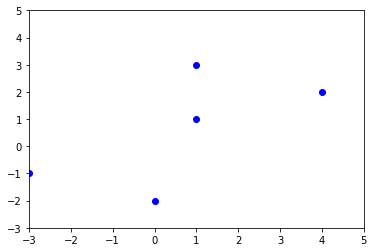

In [78]:
a = np.array([1,1])
b = np.array([4,2])
c = np.array([1,3])
d = a-b  #[3,1]
e = a-c #[-3,1]
v =np.array( [a,b,c,d,e])
plt.plot(v[:,0], v[:,1], 'bo')
lims = (-3,5)
print(f'd:{d}, e:{e}')
plt.xlim(*lims)
plt.ylim(*lims)

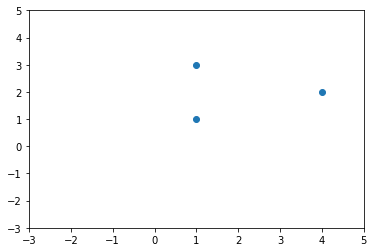

** 6. **  What is the distance for between the vectors $ a $ and $ b $?

In [70]:
a = np.array([2,4])
b = np.array([3,5])

c = a - b
print(c)

[-1 -1]


** 7. ** What is the size of the vector $ v $ ?

In [66]:
v = [1,2,35,3]
len(v)

4